<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading</a></span><ul class="toc-item"><li><span><a href="#Tropopause-loading" data-toc-modified-id="Tropopause-loading-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tropopause loading</a></span></li><li><span><a href="#Anomalies" data-toc-modified-id="Anomalies-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Anomalies</a></span></li><li><span><a href="#EPFD-significance" data-toc-modified-id="EPFD-significance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>EPFD significance</a></span></li></ul></li><li><span><a href="#Figure-2" data-toc-modified-id="Figure-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 2</a></span></li></ul></div>

In [1]:
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import shapely.geometry as sgeom

%matplotlib inline

In [2]:
%reload_ext watermark
%watermark --iversions -v -m

numpy      1.17.3
xarray     0.16.0
matplotlib 3.1.2
CPython 3.6.9
IPython 7.1.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.15.0-122-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [3]:
timescale = 20
DJF_bool = '_DJFonly'
cesta = '/mnt/4data/CMAM/0A.daily/composites_woSSW{}/'.format(DJF_bool)

# Data loading

## Tropopause loading

In [4]:
infile_name = '{}{}_{}_comp_*_{}days.nc'.format(cesta, 'ptrop', 'absolute', 20)
infiles = glob.glob(infile_name)
e_types = list(map(lambda x: x.split('comp_')[1].split('_{}days'.format(timescale))[0], infiles))
da_trop =  xr.open_mfdataset(infiles, concat_dim='e_type', combine = 'nested')
da_trop['e_type'] = e_types
da_trop['ptrop'] = da_trop.ptrop/100.
da_trop

<xarray.Dataset>
Dimensions:  (e_type: 3, lag: 21, lat: 48, lon: 96)
Coordinates:
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * e_type   (e_type) <U9 'himalayas' 'westamer' 'eastasia'
Data variables:
    ptrop    (e_type, lag, lat, lon) float64 dask.array<chunksize=(1, 21, 48, 96), meta=np.ndarray>

## Anomalies 

In [98]:
timescale = 20
num_waves = 3
wave_range = list(range(1,num_waves+1))#+['45678']
e_type_ls = ['himalayas', 'eastasia', 'westamer']
titles = ['Himalayas', 'East Asia', 'Rocky Mountains'] #'West America']
var_ls= ['acceldiv-calc_wn','ep_phi-wn', 'ep_p-wn']#, 'accelogw'] #'ua'
what = 'anomalies'

ds_ls = []
for var in var_ls:
    da_ls = []
    for i,e_type in enumerate(e_type_ls):
        if var == 'accelogw':
            da_wave = xr.open_dataarray(f'{cesta}{var}_{what}_comp_{e_type}_{timescale}days.nc')
            #print(da)
        else:
            da_wave_ls = []
            for i in wave_range:
                infile = f'{cesta}{var}{i}_{what}_comp_{e_type}_{timescale}days.nc'
                print(infile)
                da = xr.open_dataarray(infile)
                #da = da.squeeze()
                da = da.reset_coords(drop=True)
                if i == '45678':
                    da = da.expand_dims('wave')
                    da['wave'] = [i]
                    
                #da['plev'] = da.plev/100.
                da_wave_ls.append(da)
                
            da_wave = xr.concat(da_wave_ls, dim = 'wave')                
            #print(da)#.data_vars.keys()[0])
        
            #print(da_wave)
        da_ls.append(da_wave)
    da_conc = xr.concat(da_ls, dim = 'e_type')
    da_conc['e_type'] = e_type_ls 
    ds_ls.append(da_conc)
    
ds_all = xr.merge(ds_ls)#, compat='override')
ds_all

/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn1_anomalies_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn2_anomalies_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn3_anomalies_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn1_anomalies_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn2_anomalies_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn3_anomalies_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn1_anomalies_comp_westamer_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn2_anomalies_comp_westamer_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn3_anomalies_comp_westamer_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/ep_phi-wn1_anomalies_comp_him

<xarray.Dataset>
Dimensions:            (e_type: 3, lag: 21, lat: 48, plev: 63, wave: 3)
Coordinates:
  * plev               (plev) float64 1e+03 925.0 850.0 ... 0.0015 0.001 0.0007
  * wave               (wave) int64 1 2 3
  * lag                (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 ... 3 4 5 6 7 8 9 10
  * lat                (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * e_type             (e_type) <U9 'himalayas' 'eastasia' 'westamer'
Data variables:
    acceldiv-calc_wn1  (e_type, lag, wave, plev, lat) float64 0.3863 ... -1.319
    ep_phi-wn1         (e_type, lag, wave, plev, lat) float64 0.1179 ... 0.7105
    ep_p-wn1           (e_type, lag, plev, lat, wave) float64 0.001382 ... 2....

## EPFD significance

In [10]:
da_pv_ls = []
for e_type in e_type_ls:
    
    da_wave_ls = []
    for i in wave_range:
        outfile_name = f'{cesta}acceldiv-calc_wn{i}_pvalues_from10000_comp_{e_type}_20days.nc'
        print(outfile_name)
        da_pv = xr.open_dataarray(outfile_name)
        #da_pv['plev'] = da_pv.plev/100.
        
        da_pv = da_pv.reset_coords(drop=True)
        if i == '45678':
            da_pv = da_pv.expand_dims('wave')
            da_pv['wave'] = [i]

        da_wave_ls.append(da_pv)
            
    da_pv_ls.append(xr.concat(da_wave_ls, dim = 'wave'))

da_pv_all = xr.concat(da_pv_ls, dim = 'e_type')
da_pv_all['e_type'] = e_type_ls 
da_pv_all


/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn1_pvalues_from10000_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn2_pvalues_from10000_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn3_pvalues_from10000_comp_himalayas_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn1_pvalues_from10000_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn2_pvalues_from10000_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn3_pvalues_from10000_comp_eastasia_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn1_pvalues_from10000_comp_westamer_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn2_pvalues_from10000_comp_westamer_20days.nc
/mnt/4data/CMAM/0A.daily/composites_woSSW_DJFonly/acceldiv-calc_wn3_pvalues_from10000_comp_westamer_20days.nc


<xarray.DataArray 'acceldiv-calc_wn1' (e_type: 3, wave: 3, plev: 63, lat: 48, lag: 21)>
array([[[[[3.28205588e-01, 3.27835158e-01, 3.78772455e-01, ...,
           2.80774020e-01, 3.51969063e-01, 2.85913867e-01],
          [2.02229144e-02, 2.01974400e-02, 2.05142325e-02, ...,
           2.02296275e-02, 2.03739222e-02, 1.99859107e-02],
          [1.47198396e-01, 1.50038959e-01, 1.57334155e-01, ...,
           1.42796969e-01, 1.53788635e-01, 1.22501325e-01],
          ...,
          [1.39210748e-01, 1.40276781e-01, 8.62201418e-02, ...,
           3.64611671e-02, 1.37749424e-01, 1.37459678e-01],
          [1.26402788e-01, 8.61063273e-02, 6.39535694e-03, ...,
           1.19603501e-01, 4.45767948e-02, 1.20499332e-01],
          [9.28125972e-03, 9.07980327e-03, 8.78961336e-03, ...,
           8.92283256e-03, 8.81509250e-03, 9.33044875e-03]],

         [[3.04610624e-01, 2.99432398e-01, 3.63087941e-01, ...,
           2.73985904e-01, 3.33085915e-01, 2.74558812e-01],
          [4.44588945e-02, 4.42079511e-02, 4.36872443e-02, ...,
           4.44244749e-02, 4.44904615e-02, 4.40827560e-02],
          [2.51764834e-01, 2.55235253e-01, 2.69809645e-01, ...,
           2.72502845e-01, 2.69678306e-01, 2.72647797e-01],
...
          [1.92051360e-01, 1.99653928e-01, 1.20979910e-01, ...,
           1.90149474e-01, 2.00526877e-01, 1.94938987e-01],
          [1.80974155e-01, 1.85838020e-01, 1.74896683e-01, ...,
           1.75335349e-01, 1.52646718e-01, 1.88319780e-01],
          [1.73330472e-01, 2.61334051e-01, 2.00368469e-01, ...,
           2.42647269e-01, 2.31541902e-01, 1.35749547e-01]],

         [[1.02503808e-01, 1.12424123e-01, 9.93523953e-02, ...,
           1.12467011e-01, 9.39680222e-02, 1.10361171e-01],
          [8.30748061e-02, 6.43389094e-02, 6.80835356e-02, ...,
           7.63906419e-02, 8.30418354e-02, 8.29070578e-02],
          [8.17448003e-02, 1.01718929e-01, 8.59484932e-02, ...,
           7.97560689e-02, 7.46406774e-02, 7.01042240e-02],
          ...,
          [1.42545178e-01, 1.03518542e-01, 1.35102965e-01, ...,
           1.36361537e-01, 1.43957712e-01, 1.29263610e-01],
          [9.42101952e-02, 1.17700118e-01, 1.25126762e-01, ...,
           1.24390587e-01, 1.14515602e-01, 1.18946414e-01],
          [1.45627976e-01, 1.35494331e-01, 9.93705984e-02, ...,
           1.24141627e-01, 1.46581496e-01, 1.26873378e-01]]]]])
Coordinates:
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 ... 0.0015 0.001 0.0007
  * wave     (wave) int64 1 2 3
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * e_type   (e_type) <U9 'himalayas' 'eastasia' 'westamer'

In [11]:
pv_limit = 0.05 #0.05
ds_all[f'acceldiv-calc_wn1'] = ds_all[f'acceldiv-calc_wn1'].where(da_pv_all < pv_limit)
    
plev_start = 300#1000#300
plev_end = 1#50#1
lat_start = 0
ds_all_sel = ds_all.sel(lag = 0, lat = slice(lat_start,None), plev = slice(plev_start,plev_end))
lat = ds_all_sel.lat.values
lev = ds_all_sel.plev.values

# Figure 2

EPFD+EPfluxes+wavenumbers-123_anomalies_all_20days_zm_wEPFDsignificancetropopause_DJFonly_pvalue0.05.pdf


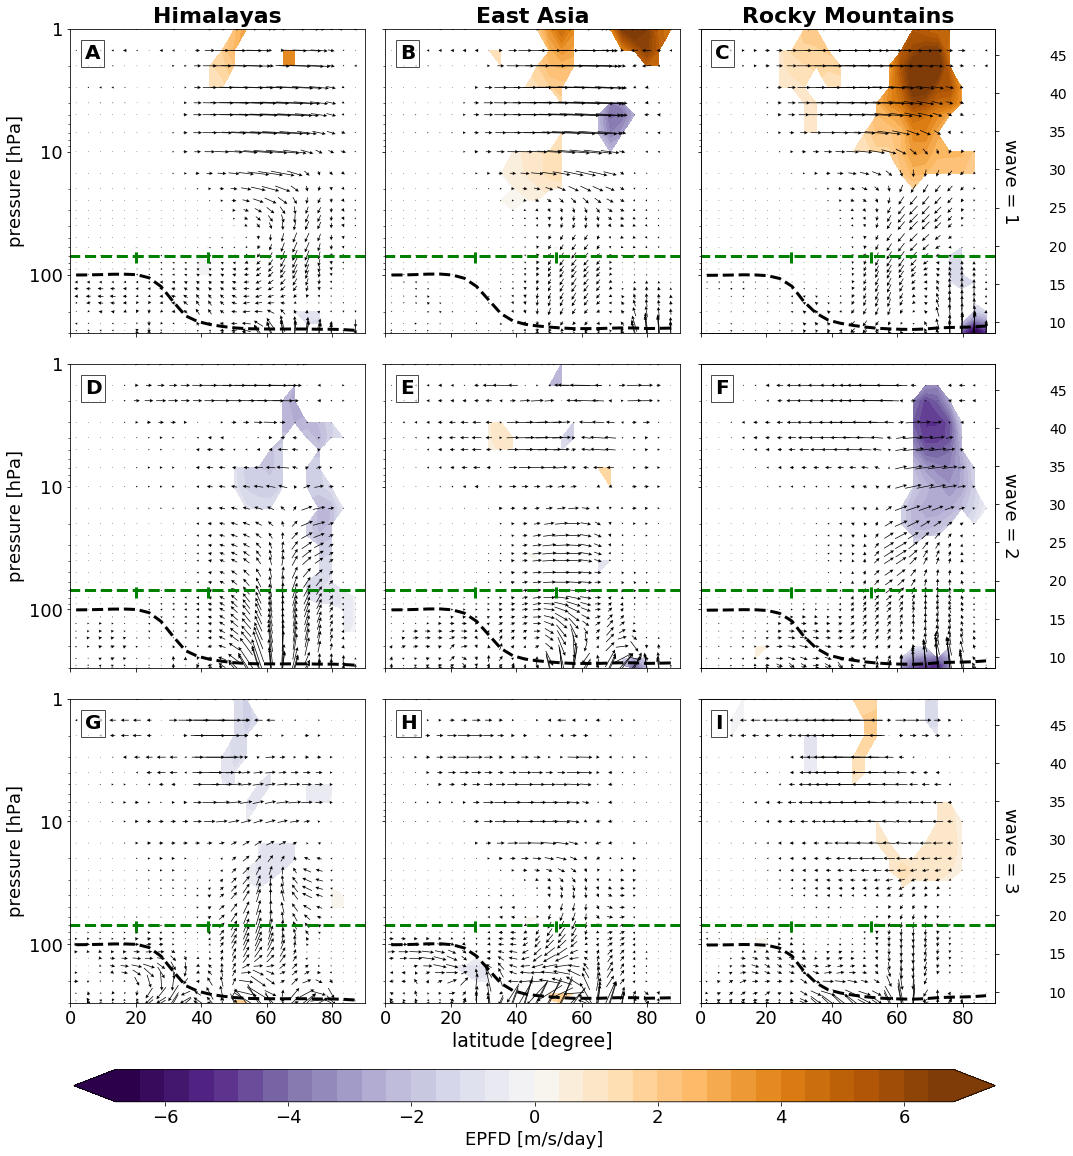

In [99]:
mpl.rcParams.update({'font.size': 18})

p = xr.plot.FacetGrid(ds_all_sel['acceldiv-calc_wn1'], col = 'e_type', row = 'wave', size = 5)

levels = np.arange(-7.2,7.6,0.4)
label_ls = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

cmap = mpl.cm.PuOr_r#RdBu_r
plot_kwargs = dict(yincrease = False, levels=levels, add_colorbar=False, cmap = cmap)
p.map_dataarray(xr.plot.contourf, 'lat', 'plev', **plot_kwargs)

da_trop2 = da_trop.ptrop.sel(lag=0, lat = slice(lat_start,None)).mean('lon')
for i,(ax, sel_dict, label) in enumerate(zip(p.axes.flat, p.name_dicts.flat, label_ls)):
    ax.plot(lat, da_trop2.sel(e_type = sel_dict['e_type']), 'k--', lw = 3)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
              fontsize=20, fontweight='bold', va='top', bbox={'alpha': 0.7, 'facecolor': 'white'})

    ax.quiver(lat, lev, ds_all_sel['ep_phi-wn1'].sel(**sel_dict).values, \
              ds_all_sel['ep_p-wn1'].sel(**sel_dict).values*-10000, pivot='mid', headwidth = 5, \
              scale_units = 'inches')
    ax.hlines(70,-20,90, color = 'green', linestyles='--', lw = 3)
    e_type = sel_dict['e_type']
    if e_type == 'himalayas':
        box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
    elif e_type == 'eastasia':
        box = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
    elif e_type == 'westamer':
        box = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
    ax.vlines(list(box.bounds)[1::2],80,60, color = 'green', linestyles='--', lw = 3)
    if i < 3:
        ax.set_title(titles[i], fontdict = dict(fontweight = 'bold', fontsize = 22))
    ax.set_yscale('log')
    fmt = mpl.ticker.FormatStrFormatter("%g")
    ax.yaxis.set_major_formatter(fmt)
    
    if i in list(range(2,(num_waves+1)*3,3)):
        ax2 = ax.twinx()
        ax2.get_shared_y_axes()
        ax2.axis([lat_start, 90, 7*np.log(1013.25/plev_start), 7*np.log(1013.25/plev_end)])
        ax2.tick_params(direction='out', which='both', labelsize=14, pad = 50)
        #ax2.set_ylabel('height [km]', fontdict = dict(fontsize = 18))
        
    if i == 3:
        ax.set_ylabel('pressure [hPa]', fontdict = dict(fontsize = 19))
    else:
        ax.set_ylabel('')
        
        
    if i == 5:
        ax2.set_ylabel('height [km]', fontdict = dict(fontsize = 19))
    else:
        ax2.set_ylabel('')      
    
    if i == 7:
        ax.set_xlabel('latitude [degree]', fontdict = dict(fontsize = 19))
    else:
        ax.set_xlabel('')

p.set_ylabels('pressure [hPa]', fontdict = dict(fontsize = 18))


p.fig.subplots_adjust(right=0.875)
cbar_ax = p.fig.add_axes([0.075, -0.03, .8, .03])
norm = mpl.colors.BoundaryNorm(levels[1:-1], cmap.N)
cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, \
                                norm=norm, orientation='horizontal', \
                                boundaries=levels, extend='both', \
                                ticks=[-6,-4,-2,0,2,4,6], label='EPFD [m/s/day]')#, spacing='proportional')"""
                               

suffix = '_DJFonly'
outfile=f'EPFD+EPfluxes+wavenumbers-123_{what}_all_{timescale}days_zm_wEPFDsignificancetropopause{suffix}_pvalue{pv_limit}.pdf'
print(outfile)
plt.savefig(outfile, bbox_inches='tight')